In [1]:
# Importação da bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de resíduos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning
from yellowbrick.regressor import ResidualsPlot

In [2]:
# Carregamento da base de dados e exclusão da primeira coluna
base = pd.read_csv('../data/cars.csv')
base.shape

(50, 3)

In [3]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [4]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [5]:
# Definição das variáveis X e Y, x é a variaveis independente e y é a variavel dependente
x = base.iloc[:, 1].values
y = base.iloc[:, 0].values
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [6]:
# Cálculo da correlação entre x e y
correlacao = np.corrcoef(x, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [7]:
# Formato da matriz com uma coluna a mais
x = x.reshape(-1, 1)
# Crianção do modelo e treinamento(fit indeica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [8]:
# Visualizacação do coeficiente
modelo.intercept_

8.283905641787172

In [9]:
# Inclinação
modelo.coef_

array([0.16556757])

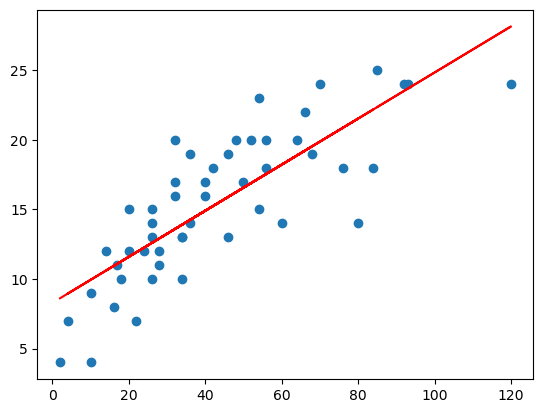

In [10]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

In [11]:
# Previsão da "distância 22 pés" usando a fórmula manual
# interceptação + inclinação * valor de dist
# Qual velocidade se levou 22 pés pra parar
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [12]:
# Previsão usando a função do sklearn
modelo.predict([[22]])

array([11.92639228])

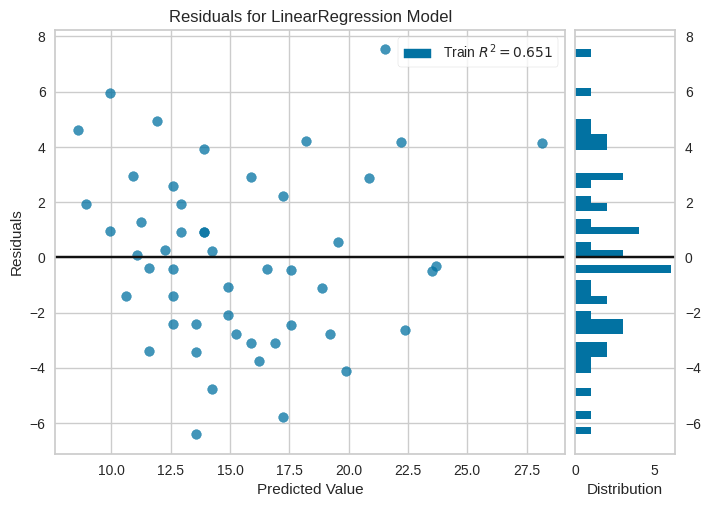

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()